## **1️⃣ Load the Datasets**  
We begin by loading the **Reddit** and **Twitter** datasets to start the exploratory data analysis (EDA).

### **Why This Matters?**  
- Loading the datasets is the first step in any analysis, as it provides access to the data we will analyze.  
- We need to verify that the data is correctly loaded and accessible before performing any further steps.  
- We will check for any potential issues in the data structure, such as missing values or incorrect types.

### **Steps Taken:**  
- `pd.read_csv()` loads the **Reddit** and **Twitter** datasets from their respective file paths.  
- We assign the dataframes to `reddit_df` and `twitter_df` for further analysis.
- `reddit_df.info()` and `twitter_df.info()` display basic information about the datasets, such as the number of entries, column data types, and memory usage.
- This helps us to ensure that the data is loaded properly and examine its initial structure.

In [2]:
import pandas as pd

# Load the datasets
reddit_path = "Reddit_Data.csv"
twitter_path = "Twitter_Data.csv"

reddit_df = pd.read_csv(reddit_path)
twitter_df = pd.read_csv(twitter_path)

# Display basic information about the datasets
reddit_info = reddit_df.info()
twitter_info = twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


## **2️⃣ Preview the Datasets**  
We inspect the first few rows of the **Reddit** and **Twitter** datasets to get an overview of the data structure and understand its contents.

### **Steps Taken:**  
- `reddit_df.head()` and `twitter_df.head()` display the first few rows of each dataset.  
- This allows us to quickly view a snapshot of the data, including the columns and sample values.
- Reviewing the data at this stage helps identify any obvious issues, such as incorrect formatting, missing values, or unexpected data types.

In [4]:
# Show the first few rows of each dataset
reddit_head = reddit_df.head()
twitter_head = twitter_df.head()

## **3️⃣ Check for Missing Values**  
We check both the **Reddit** and **Twitter** datasets for any missing values that could affect the analysis and model training.

### **Steps Taken:**  
- `reddit_df.isnull().sum()` and `twitter_df.isnull().sum()` calculate the total number of missing values in each column of the datasets.  
- This helps us identify columns with missing data and determine whether any preprocessing steps (e.g., imputation or removal of missing data) are necessary.
- Handling missing values is crucial, as they can negatively impact model performance and lead to biased results.

In [6]:
# Check for missing values
reddit_missing = reddit_df.isnull().sum()
twitter_missing = twitter_df.isnull().sum()

## **4️⃣ Check for Duplicate Rows**  
We check both the **Reddit** and **Twitter** datasets for duplicate rows that could skew our analysis and model training.

### **Steps Taken:**  
- `reddit_df.duplicated().sum()` and `twitter_df.duplicated().sum()` calculate the total number of duplicate rows in each dataset.  
- This helps us identify if any data entries are repeated, which could lead to overrepresentation of certain data points and affect model accuracy.
- Removing duplicate rows ensures that each data point is unique, preventing bias in the analysis.

In [8]:
# Check for duplicate rows
reddit_duplicates = reddit_df.duplicated().sum()
twitter_duplicates = twitter_df.duplicated().sum()

## **5️⃣ Check Sentiment Distribution**
We analyze the sentiment distribution in both the Reddit and Twitter datasets to examine how the sentiment classes are distributed.

### **Steps Taken:** 
reddit_df.iloc[:, -1].value_counts() and twitter_df.iloc[:, -1].value_counts() calculate the frequency of each sentiment class in the datasets.
This provides insights into the class distribution, which helps identify if there is any imbalance in sentiment representation (e.g., more positive vs. negative sentiment).
Analyzing the distribution is essential for understanding the structure of the data and considering potential strategies for handling class imbalance.

In [10]:
# Check sentiment distribution
reddit_sentiment_dist = reddit_df.iloc[:, -1].value_counts()
twitter_sentiment_dist = twitter_df.iloc[:, -1].value_counts()

### **6️⃣ Display Initial Insights**
We display the initial insights into the datasets, such as basic information, the first few rows, missing values, duplicate rows, and sentiment distributions.

### **Steps Taken:**
The reddit_info, twitter_info, reddit_head, twitter_head, reddit_missing, twitter_missing, reddit_duplicates, twitter_duplicates, reddit_sentiment_dist, and twitter_sentiment_dist variables are printed to display key details.
These insights help verify the structure and quality of the datasets and allow us to check for any anomalies or necessary cleaning steps.
The goal is to ensure we have a solid understanding of the data before moving forward with further analysis or modeling.

In [12]:
# Display the insights
reddit_info, twitter_info, reddit_head, twitter_head, reddit_missing, twitter_missing, reddit_duplicates, twitter_duplicates, reddit_sentiment_dist, twitter_sentiment_dist

(None,
 None,
                                        clean_comment  category
 0   family mormon have never tried explain them t...         1
 1  buddhism has very much lot compatible with chr...         1
 2  seriously don say thing first all they won get...        -1
 3  what you have learned yours and only yours wha...         0
 4  for your own benefit you may want read living ...         1,
                                           clean_text  category
 0  when modi promised “minimum government maximum...      -1.0
 1  talk all the nonsense and continue all the dra...       0.0
 2  what did just say vote for modi  welcome bjp t...       1.0
 3  asking his supporters prefix chowkidar their n...       1.0
 4  answer who among these the most powerful world...       1.0,
 clean_comment    100
 category           0
 dtype: int64,
 clean_text    4
 category      7
 dtype: int64,
 449,
 1,
 category
  1    15830
  0    13142
 -1     8277
 Name: count, dtype: int64,
 category
  1.0    72

### **7️⃣ Drop Missing Values**
We remove any rows with missing values in both the Reddit and Twitter datasets to ensure data completeness and avoid errors in modeling.

### **Steps Taken:**
reddit_df.dropna() and twitter_df.dropna() drop any rows with missing values in the datasets.
This is essential for ensuring that our models receive clean, complete data, as missing values can lead to inaccurate results.
After dropping missing data, we reassign the cleaned datasets to reddit_df_cleaned and twitter_df_cleaned.


In [14]:
# Drop missing values
reddit_df_cleaned = reddit_df.dropna()
twitter_df_cleaned = twitter_df.dropna()

### **8️⃣ Drop Duplicate Rows**
We remove duplicate rows from the datasets to ensure each data point is unique, improving the quality of our analysis.

### **Steps Taken:**
reddit_df_cleaned.drop_duplicates() and twitter_df_cleaned.drop_duplicates() eliminate any duplicate rows.
Removing duplicates prevents overrepresentation of certain entries and ensures the datasets remain accurate and unbiased.
After this step, the cleaned datasets are reassigned to reddit_df_cleaned and twitter_df_cleaned.

In [16]:
# Drop duplicate rows
reddit_df_cleaned = reddit_df_cleaned.drop_duplicates()
twitter_df_cleaned = twitter_df_cleaned.drop_duplicates()

### **9️⃣ Convert Data Types for Consistency**
We ensure that the Twitter category column is an integer type and the text columns in both datasets are strings, promoting consistency across the data.

### **Steps Taken:**
twitter_df_cleaned['category'].astype(int) converts the category column to integers.
reddit_df_cleaned['clean_comment'].astype(str) and twitter_df_cleaned['clean_text'].astype(str) ensure the text columns are treated as strings.
This ensures that all columns are in the correct format for analysis and modeling.

In [18]:
# Convert category to integer (for Twitter dataset)
twitter_df_cleaned['category'] = twitter_df_cleaned['category'].astype(int)

### **🔟 Verify Cleaning Results**
We check the data types and structure of the cleaned datasets to verify that the cleaning process has been successful.

### **Steps Taken:**
reddit_df_cleaned.info() and twitter_df_cleaned.info() display the updated information for the cleaned datasets.
This helps us confirm that the cleaning process (handling missing values, duplicates, and data type conversions) has been applied correctly.

In [20]:
# Convert text column to string (ensure it's consistent)
reddit_df_cleaned['clean_comment'] = reddit_df_cleaned['clean_comment'].astype(str)
twitter_df_cleaned['clean_text'] = twitter_df_cleaned['clean_text'].astype(str)

In [21]:
# Verify cleaning results
reddit_clean_info = reddit_df_cleaned.info()
twitter_clean_info = twitter_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36799 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  36799 non-null  object
 1   category       36799 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 862.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  162969 non-null  object
 1   category    162969 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 3.1+ MB


### **1️⃣1️⃣ Check Updated Sentiment Distribution**
We check the updated sentiment distribution in the cleaned datasets to confirm that the cleaning process has not affected the sentiment classes.

In [23]:
# Check updated sentiment distribution
reddit_sentiment_dist_clean = reddit_df_cleaned['category'].value_counts()
twitter_sentiment_dist_clean = twitter_df_cleaned['category'].value_counts()

reddit_clean_info, twitter_clean_info, reddit_sentiment_dist_clean, twitter_sentiment_dist_clean

(None,
 None,
 category
  1    15771
  0    12778
 -1     8250
 Name: count, dtype: int64,
 category
  1    72249
  0    55211
 -1    35509
 Name: count, dtype: int64)

In [24]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [25]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [27]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...


True

### **1️⃣2️⃣ Text Cleaning and Preprocessing**
We preprocess the text in both the Reddit and Twitter datasets to ensure consistency and remove any irrelevant information for analysis.

In [29]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [30]:
# Function for text cleaning and preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize words
    words = text.split()
    
    # Remove stopwords and apply lemmatization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return " ".join(words)

### **1️⃣3️⃣ Save Cleaned Datasets**
We save the cleaned Reddit and Twitter datasets to CSV files for further analysis or model training.

In [32]:
# Save cleaned datasets (optional)
reddit_df_cleaned.to_csv("Reddit_Cleaned.csv", index=False)
twitter_df_cleaned.to_csv("Twitter_Cleaned.csv", index=False)

### **1️⃣4️⃣ Display Sample Cleaned Text**
We display the first few rows of the cleaned text from both the Reddit and Twitter datasets to ensure that the preprocessing was applied correctly.

In [34]:
# Display sample cleaned text
print(reddit_df_cleaned.head())
print(twitter_df_cleaned.head())

                                       clean_comment  category
0   family mormon have never tried explain them t...         1
1  buddhism has very much lot compatible with chr...         1
2  seriously don say thing first all they won get...        -1
3  what you have learned yours and only yours wha...         0
4  for your own benefit you may want read living ...         1
                                          clean_text  category
0  when modi promised “minimum government maximum...        -1
1  talk all the nonsense and continue all the dra...         0
2  what did just say vote for modi  welcome bjp t...         1
3  asking his supporters prefix chowkidar their n...         1
4  answer who among these the most powerful world...         1


In [35]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import itertools
from nltk.util import ngrams

### 1️⃣7️⃣ Plot Sentiment Distribution
We create a plot to visualize the distribution of sentiments in the dataset, showing the count of each sentiment class (Negative, Neutral, and Positive).

In [38]:
def plot_sentiment_distribution(df, title):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df['category'], palette="viridis")
    plt.title(title)
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.xticks(ticks=[0, 1, 2], labels=["Negative (-1)", "Neutral (0)", "Positive (1)"])
    plt.show()

### 1️⃣9️⃣ Plot Most Common Words
We plot the most common words in the dataset using a bar plot to show their frequencies.

In [40]:
def generate_wordcloud(text_data, title):
    text = " ".join(text_data)
    wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='coolwarm').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

### 2️⃣0️⃣ Plot N-Grams
We generate and plot the most common n-grams (bigrams or trigrams) in the dataset, which reveals frequent word combinations.

In [42]:
def plot_most_common_words(text_data, title, num_words=20):
    all_words = list(itertools.chain(*[text.split() for text in text_data]))
    common_words = Counter(all_words).most_common(num_words)
    
    words, counts = zip(*common_words)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(counts), y=list(words), palette="coolwarm")
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()

In [43]:
def plot_ngrams(text_data, title, n=2, num_words=15):
    all_ngrams = list(itertools.chain(*[list(ngrams(text.split(), n)) for text in text_data]))
    common_ngrams = Counter(all_ngrams).most_common(num_words)
    
    ngram_texts, counts = zip(*common_ngrams)
    ngram_strings = [" ".join(ngram) for ngram in ngram_texts]
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(counts), y=ngram_strings, palette="magma")
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("N-grams")
    plt.show()

📊 Reddit Sentiment Distribution


C:\Users\Dell\AppData\Local\Temp\ipykernel_12956\770420276.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['category'], palette="viridis")


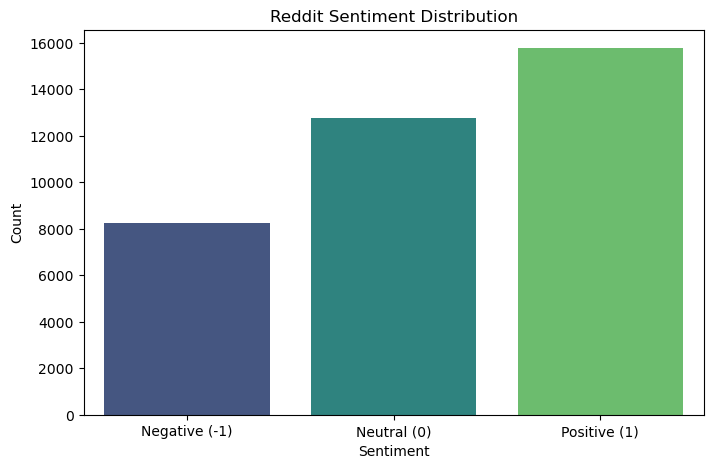

In [44]:
print("📊 Reddit Sentiment Distribution")
plot_sentiment_distribution(reddit_df_cleaned, "Reddit Sentiment Distribution")

☁️ Word Cloud - Positive Sentiment (Reddit)


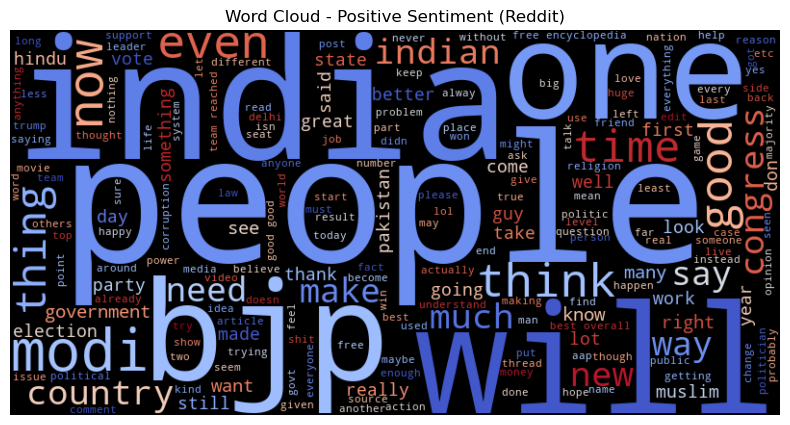

In [45]:
print("☁️ Word Cloud - Positive Sentiment (Reddit)")
generate_wordcloud(reddit_df_cleaned[reddit_df_cleaned['category'] == 1]['clean_comment'], "Word Cloud - Positive Sentiment (Reddit)")

☁️ Word Cloud - Negative Sentiment (Reddit)


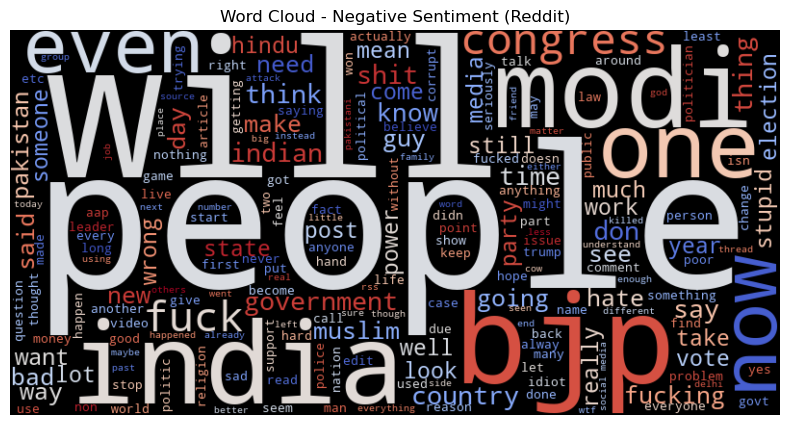

In [46]:
print("☁️ Word Cloud - Negative Sentiment (Reddit)")
generate_wordcloud(reddit_df_cleaned[reddit_df_cleaned['category'] == -1]['clean_comment'], "Word Cloud - Negative Sentiment (Reddit)")

📌 Most Common Words - Reddit


C:\Users\Dell\AppData\Local\Temp\ipykernel_12956\1104737586.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="coolwarm")


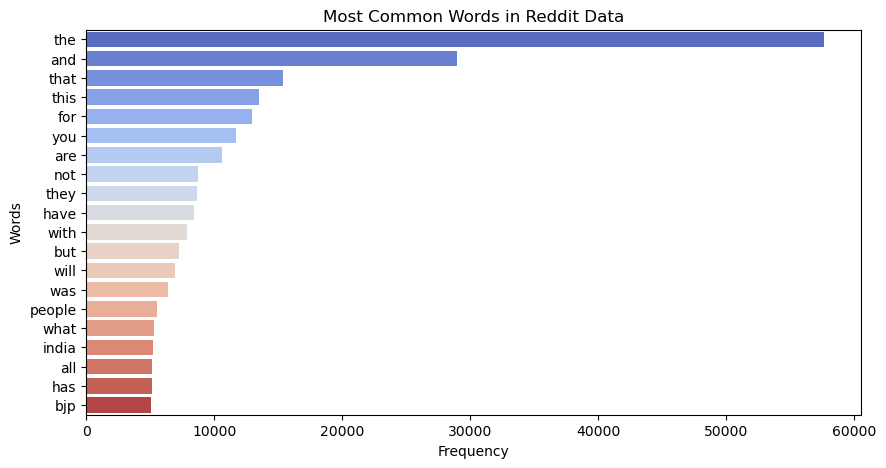

In [47]:
print("📌 Most Common Words - Reddit")
plot_most_common_words(reddit_df_cleaned['clean_comment'], "Most Common Words in Reddit Data")

📊 Bigrams - Reddit


C:\Users\Dell\AppData\Local\Temp\ipykernel_12956\3883151155.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=ngram_strings, palette="magma")


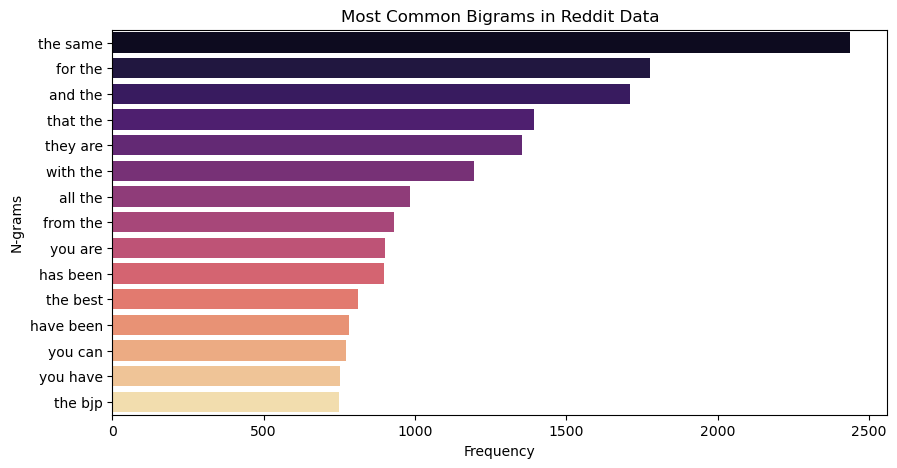

In [48]:
print("📊 Bigrams - Reddit")
plot_ngrams(reddit_df_cleaned['clean_comment'], "Most Common Bigrams in Reddit Data", n=2)

📊 Trigrams - Reddit


C:\Users\Dell\AppData\Local\Temp\ipykernel_12956\3883151155.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=ngram_strings, palette="magma")


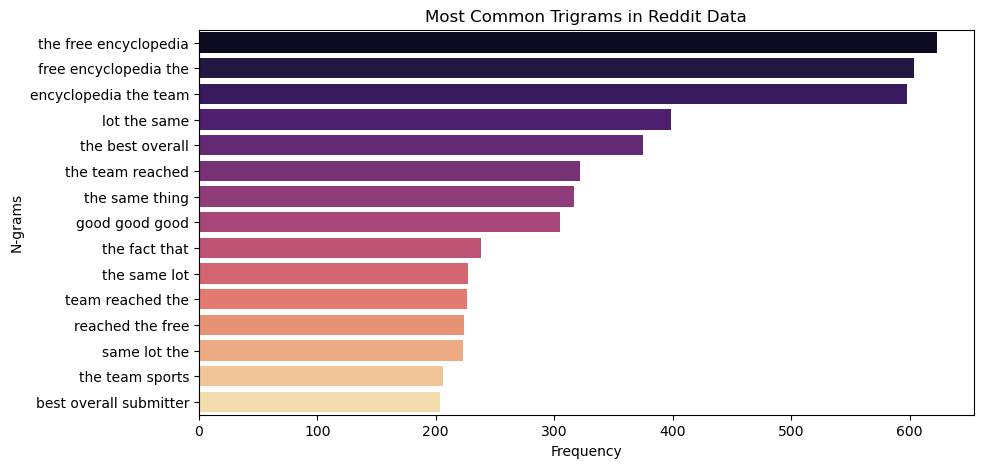

In [49]:
print("📊 Trigrams - Reddit")
plot_ngrams(reddit_df_cleaned['clean_comment'], "Most Common Trigrams in Reddit Data", n=3)

📊 Twitter Sentiment Distribution


C:\Users\Dell\AppData\Local\Temp\ipykernel_12956\770420276.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['category'], palette="viridis")


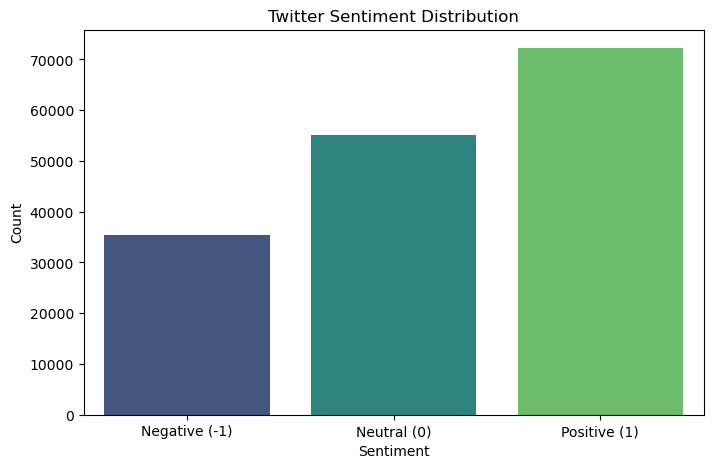

In [50]:
print("📊 Twitter Sentiment Distribution")
plot_sentiment_distribution(twitter_df_cleaned, "Twitter Sentiment Distribution")

☁️ Word Cloud - Positive Sentiment (Twitter)


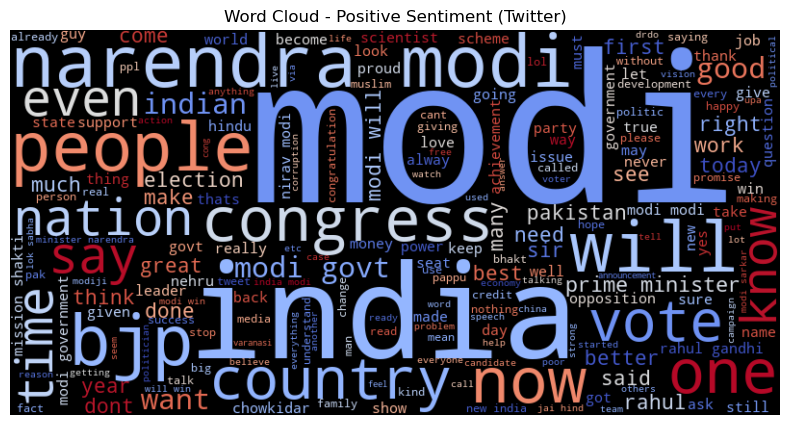

In [51]:
print("☁️ Word Cloud - Positive Sentiment (Twitter)")
generate_wordcloud(twitter_df_cleaned[twitter_df_cleaned['category'] == 1]['clean_text'], "Word Cloud - Positive Sentiment (Twitter)")

☁️ Word Cloud - Negative Sentiment (Twitter)


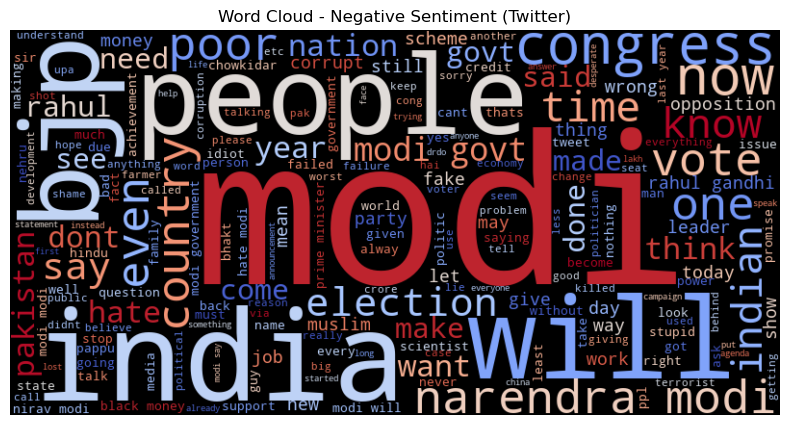

In [52]:
print("☁️ Word Cloud - Negative Sentiment (Twitter)")
generate_wordcloud(twitter_df_cleaned[twitter_df_cleaned['category'] == -1]['clean_text'], "Word Cloud - Negative Sentiment (Twitter)")

📌 Most Common Words - Twitter


C:\Users\Dell\AppData\Local\Temp\ipykernel_12956\1104737586.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="coolwarm")


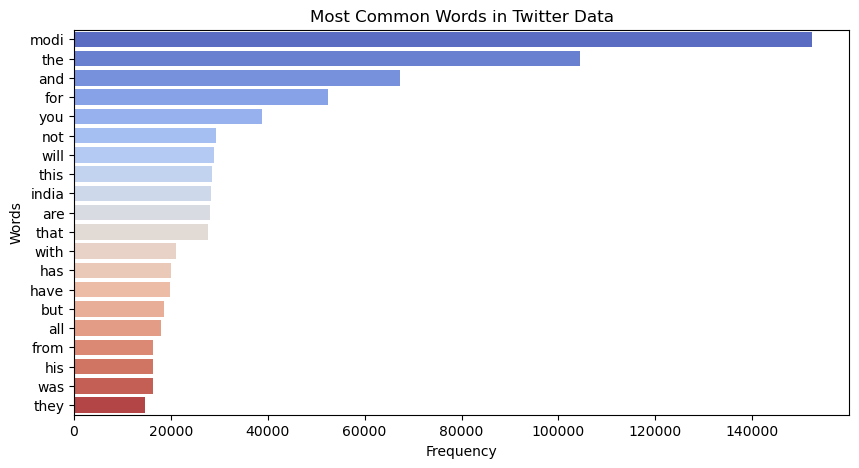

In [53]:
print("📌 Most Common Words - Twitter")
plot_most_common_words(twitter_df_cleaned['clean_text'], "Most Common Words in Twitter Data")

📊 Bigrams - Twitter


C:\Users\Dell\AppData\Local\Temp\ipykernel_12956\3883151155.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=ngram_strings, palette="magma")


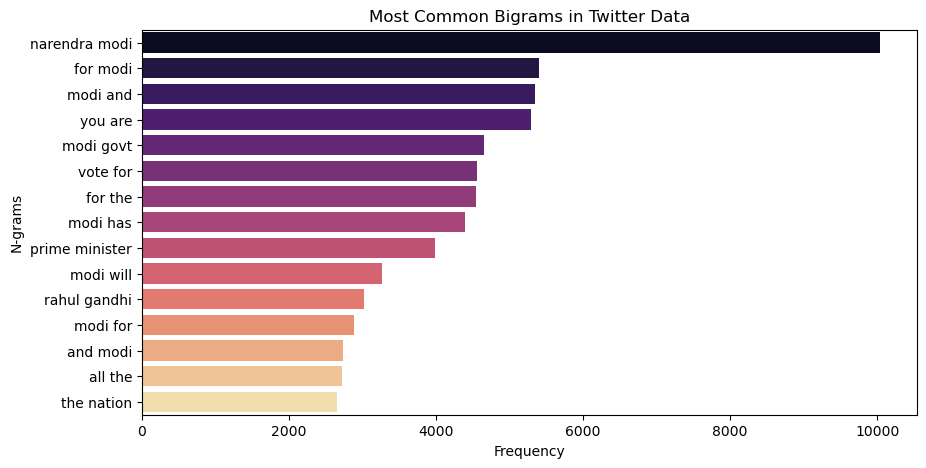

In [54]:
print("📊 Bigrams - Twitter")
plot_ngrams(twitter_df_cleaned['clean_text'], "Most Common Bigrams in Twitter Data", n=2)

📊 Trigrams - Twitter


C:\Users\Dell\AppData\Local\Temp\ipykernel_12956\3883151155.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=ngram_strings, palette="magma")


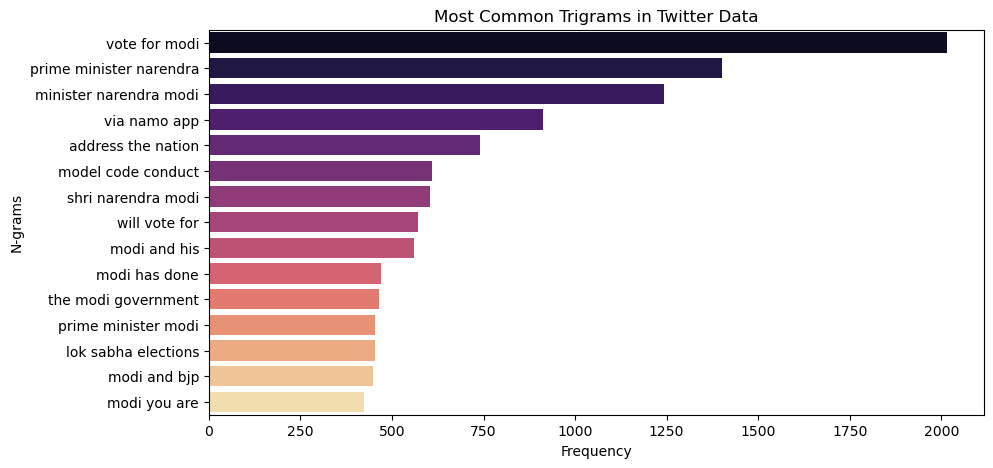

In [55]:
print("📊 Trigrams - Twitter")
plot_ngrams(twitter_df_cleaned['clean_text'], "Most Common Trigrams in Twitter Data", n=3)

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))

# Prepare Reddit Data
X_reddit = tfidf_vectorizer.fit_transform(reddit_df_cleaned['clean_comment'])
y_reddit = reddit_df_cleaned['category']

# Prepare Twitter Data
X_twitter = tfidf_vectorizer.fit_transform(twitter_df_cleaned['clean_text'])
y_twitter = twitter_df_cleaned['category']

# Split Reddit Data
X_train_reddit, X_test_reddit, y_train_reddit, y_test_reddit = train_test_split(X_reddit, y_reddit, test_size=0.2, random_state=42)

# Split Twitter Data
X_train_twitter, X_test_twitter, y_train_twitter, y_test_twitter = train_test_split(X_twitter, y_twitter, test_size=0.2, random_state=42)

# Print shapes of the datasets
print(f"Reddit Train Shape: {X_train_reddit.shape}, Reddit Test Shape: {X_test_reddit.shape}")
print(f"Twitter Train Shape: {X_train_twitter.shape}, Twitter Test Shape: {X_test_twitter.shape}")

Reddit Train Shape: (29439, 10000), Reddit Test Shape: (7360, 10000)
Twitter Train Shape: (130375, 10000), Twitter Test Shape: (32594, 10000)


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [58]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name):
    # Train model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Print evaluation metrics
    print(f"🔹 Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}\n")
    
    return model

In [59]:
# Initialize models
log_reg = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier(n_estimators=100)
svm_model = SVC(kernel='linear')

In [60]:
print("📌 Training on Reddit Data")
train_and_evaluate(log_reg, X_train_reddit, y_train_reddit, X_test_reddit, y_test_reddit, "Logistic Regression")
train_and_evaluate(random_forest, X_train_reddit, y_train_reddit, X_test_reddit, y_test_reddit, "Random Forest")
train_and_evaluate(svm_model, X_train_reddit, y_train_reddit, X_test_reddit, y_test_reddit, "SVM")

📌 Training on Reddit Data
🔹 Model: Logistic Regression
Accuracy: 0.8571
              precision    recall  f1-score   support

          -1       0.87      0.66      0.75      1651
           0       0.83      0.95      0.88      2509
           1       0.88      0.89      0.88      3200

    accuracy                           0.86      7360
   macro avg       0.86      0.83      0.84      7360
weighted avg       0.86      0.86      0.85      7360

Cross-Validation Accuracy: 0.8487 ± 0.0027

🔹 Model: Random Forest
Accuracy: 0.7677
              precision    recall  f1-score   support

          -1       0.89      0.32      0.47      1651
           0       0.81      0.90      0.85      2509
           1       0.72      0.90      0.80      3200

    accuracy                           0.77      7360
   macro avg       0.81      0.70      0.71      7360
weighted avg       0.79      0.77      0.74      7360

Cross-Validation Accuracy: 0.7642 ± 0.0035

🔹 Model: SVM
Accuracy: 0.8804
        

SVC(kernel='linear')

In [61]:
print("\n📌 Training on Twitter Data")
train_and_evaluate(log_reg, X_train_twitter, y_train_twitter, X_test_twitter, y_test_twitter, "Logistic Regression")
train_and_evaluate(random_forest, X_train_twitter, y_train_twitter, X_test_twitter, y_test_twitter, "Random Forest")
train_and_evaluate(svm_model, X_train_twitter, y_train_twitter, X_test_twitter, y_test_twitter, "SVM")


📌 Training on Twitter Data
🔹 Model: Logistic Regression
Accuracy: 0.9184
              precision    recall  f1-score   support

          -1       0.91      0.81      0.86      7152
           0       0.90      0.97      0.94     11067
           1       0.93      0.93      0.93     14375

    accuracy                           0.92     32594
   macro avg       0.92      0.90      0.91     32594
weighted avg       0.92      0.92      0.92     32594

Cross-Validation Accuracy: 0.9132 ± 0.0009

🔹 Model: Random Forest
Accuracy: 0.8352
              precision    recall  f1-score   support

          -1       0.90      0.59      0.71      7152
           0       0.83      0.91      0.87     11067
           1       0.82      0.90      0.86     14375

    accuracy                           0.84     32594
   macro avg       0.85      0.80      0.81     32594
weighted avg       0.84      0.84      0.83     32594

Cross-Validation Accuracy: 0.8302 ± 0.0045

🔹 Model: SVM
Accuracy: 0.9347
      

SVC(kernel='linear')

In [62]:
pip install streamlit scikit-learn pandas joblib

Note: you may need to restart the kernel to use updated packages.


### 2️⃣1️⃣ Save the Models
We save the trained models and vectorizer to disk for later use, ensuring that we can load them back and make predictions without retraining.

In [65]:
import joblib

# Save the models
joblib.dump(log_reg, "logistic_regression.pkl")
joblib.dump(random_forest, "random_forest.pkl")
joblib.dump(svm_model, "svm_model.pkl")


print("✅ Models saved successfully!")

✅ Models saved successfully!
